In [1]:
# id:15--30--15-0 
import pandas as pd
# import data
df = pd.read_csv("week4_1.csv")
# 打印前五条数据
print(df.head())

     X1    X2  Y
0 -0.18 -0.07 -1
1  0.51 -0.90  1
2  0.53 -0.83  1
3 -0.77  0.13 -1
4 -0.53 -0.64  1


In [2]:
import numpy as np
X_1 = df.iloc[:,0] # 第一列
X_2 = df.iloc[:,1] # 第二列
y = df.iloc[:,2] # 第三列

Text(0, 0.5, 'x_2')

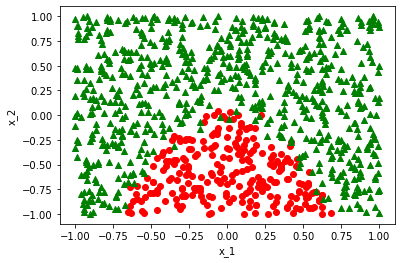

In [4]:
import matplotlib.pyplot as plt
df_p = df.loc[df['Y'] == 1]
df_n = df.loc[df['Y'] == -1]
X1_p = df_p.iloc[:,0]
X2_p = df_p.iloc[:,1]
X1_n = df_n.iloc[:,0]
X2_n = df_n.iloc[:,1]
plt.scatter(X1_p,X2_p,c='r',marker='o') # 红色点的y值为1
plt.scatter(X1_n,X2_n,c='g',marker='^') # 绿色点的y值为-1
plt.xlabel('x_1')
plt.ylabel('x_2')

### （a）

In [65]:
from sklearn.preprocessing import PolynomialFeatures
X1_train = X_1
X2_train = X_2
y_train = y

X_train = np.column_stack((X1_train,X2_train))
# list of maximum polynomial orders
degree = [1,2,3,4,5]
# augment

# degree = 1
poly_1 = PolynomialFeatures(degree[0])
X_poly_train_1 = (poly_1.fit_transform(X_train))
X_poly_test_1 = X_poly_train_1
# degree = 2
poly_2 = PolynomialFeatures(degree[1])
X_poly_train_2 = (poly_2.fit_transform(X_train))
X_poly_test_2 = X_poly_train_2
# degree = 3
poly_3 = PolynomialFeatures(degree[2])
X_poly_train_3 = (poly_3.fit_transform(X_train))
X_poly_test_3 = X_poly_train_3
# degree = 4
poly_4 = PolynomialFeatures(degree[3])
X_poly_train_4 = (poly_4.fit_transform(X_train))
X_poly_test_4 = X_poly_train_4
# degree = 5
poly_5 = PolynomialFeatures(degree[4])
X_poly_train_5 = (poly_5.fit_transform(X_train))
X_poly_test_5 = X_poly_train_5

In [71]:
from sklearn.linear_model import LogisticRegressionCV 
folds = [2,5,10,25,50,100] # cross-validation值列表
C = [1,10,100,1000] # C值列表

### 控制变量法：先固定folds数(LogisticRegressionCV)为5（default value)，选出maximum polynomial order

In [73]:
# degree = 1
reg_1 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_1,y_train) # 5 folds
reg_1.score(X_poly_test_1,y)

0.8029818956336529

In [74]:
# degree = 2
reg_2 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_2,y_train) # 5 folds
reg_2.score(X_poly_test_2,y)  

0.979765708200213

In [75]:
# degree = 3
reg_3 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_3,y_train) # 5 folds
reg_3.score(X_poly_test_3,y) 

0.9776357827476039

In [76]:
# degree = 4
reg_4 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_4,y_train) # 5 folds
reg_4.score(X_poly_test_4,y) 

D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.9765708200212992

In [77]:
# degree = 5
reg_5 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_5,y_train) # 5 folds
reg_5.score(X_poly_test_5,y) 

D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.9776357827476039

### 以上结果显示：maximum polynomial order=2

### 接下来，固定maximum polynomial order=2，找到不同folds对应的表现

In [79]:
score = []
for i in range(len(folds)):
    reg = LogisticRegressionCV(cv=folds[i],Cs=C).fit(X_poly_train_2,y_train) 
    score.append(reg.score(X_poly_test_2,y))
score = np.array(score)

### 接下来，画cross-validation plots：score vs folds number(error bars)

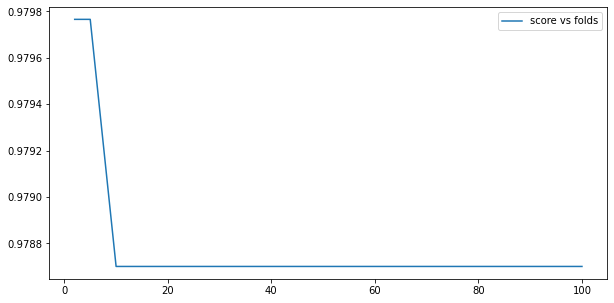

In [80]:
plt.figure(figsize=(10,5))
plt.errorbar(folds,score,label='score vs folds')
plt.legend()

### 由图可知，当folds为2或者5时，score最大

### 接下来画plots of model predictions and the training data.

In [102]:
predictions_l=reg_2.predict(X_poly_test_2) # folds = 5
predictions_l

array([ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [103]:
df_t = df
# predicted target values
df_t['Y'] = predictions_l
df_t

,X1,X2,Y
0,-0.18,-0.07,1
1,0.51,-0.90,1
2,0.53,-0.83,1
3,-0.77,0.13,-1
4,-0.53,-0.64,1
...,...,...,...
934,0.68,-0.99,1
935,-0.32,-0.23,1
936,-0.49,-0.68,1
937,0.83,0.24,-1


In [86]:
# preprocessing of predictions
df_t_p = df_t.loc[df['Y'] == 1]
df_t_n = df_t.loc[df['Y'] == -1]
X1_t_p = df_t_p.iloc[:,0]
X2_t_p = df_t_p.iloc[:,1]
X1_t_n = df_t_n.iloc[:,0]
X2_t_n = df_t_n.iloc[:,1]

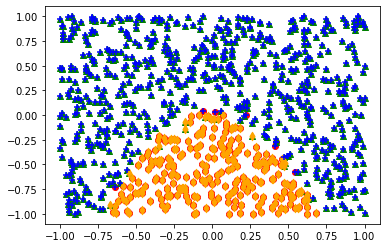

In [87]:
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_t_p,X2_t_p,c='orange',marker='d')
plt.scatter(X1_t_n,X2_t_n,c='blue',marker='+')

### 很显然，模型预测得很好（绿色和红色是训练数据，蓝色和黄色是测试数据）

### (b)

### 首先不进行augmenting the features with polynomial features

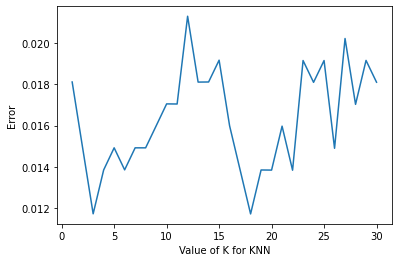

In [89]:
from sklearn.model_selection  import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 31)
k_error = []
# 循环，取k=1到k=31，查看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cv参数决定数据集划分比例，这里是按照4:1划分训练集和测试集--之所以选择5folds，是因为上一问5folds效果不错
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_error.append(1 - scores.mean())

# 画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

### 由图可知，k=3或k=18可以得到最好的表现

### 考察是否需要进行augmenting the features with polynomial features，使用上一问得到的maximum polynomial order=2

In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_poly_train_2,y_train)
predictions_k = knn.predict(X_poly_test_2)
predictions_k

array([ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [105]:
df_k_t = df
# predicted target values
df_k_t['Y'] = predictions_k
df_k_t

,X1,X2,Y
0,-0.18,-0.07,1
1,0.51,-0.90,1
2,0.53,-0.83,1
3,-0.77,0.13,-1
4,-0.53,-0.64,1
...,...,...,...
934,0.68,-0.99,1
935,-0.32,-0.23,1
936,-0.49,-0.68,1
937,0.83,0.24,-1


In [96]:
# preprocessing of predictions
df_k_t_p = df_k_t.loc[df['Y'] == 1]
df_k_t_n = df_k_t.loc[df['Y'] == -1]
X1_k_t_p = df_k_t_p.iloc[:,0]
X2_k_t_p = df_k_t_p.iloc[:,1]
X1_k_t_n = df_k_t_n.iloc[:,0]
X2_k_t_n = df_k_t_n.iloc[:,1]

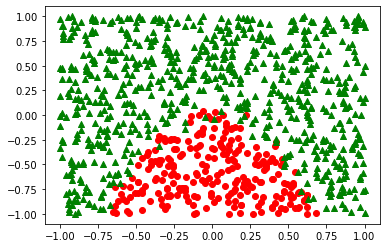

In [99]:
# training data单独画图作为对照
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')

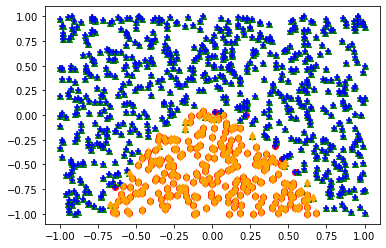

In [101]:
# training data和predictions画在一起
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_k_t_p,X2_k_t_p,c='orange',marker='d')
plt.scatter(X1_k_t_n,X2_k_t_n,c='blue',marker='+')

### 上图显示，it is worth augmenting the features with polynomial features

### (c)

### confusion matrix for my Logistic Regression

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,predictions_l)

array([[687,   1],
       [  3, 248]], dtype=int64)

### confusion matrix for my kNN

In [123]:
confusion_matrix(y,predictions_k)

array([[688,   0],
       [  0, 251]], dtype=int64)

### the most frequent class in the training data:negative

In [124]:
predictions_b = [-1]*939
predictions_b

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,


In [125]:
confusion_matrix(y,predictions_b)

array([[688,   0],
       [251,   0]], dtype=int64)

### (d)

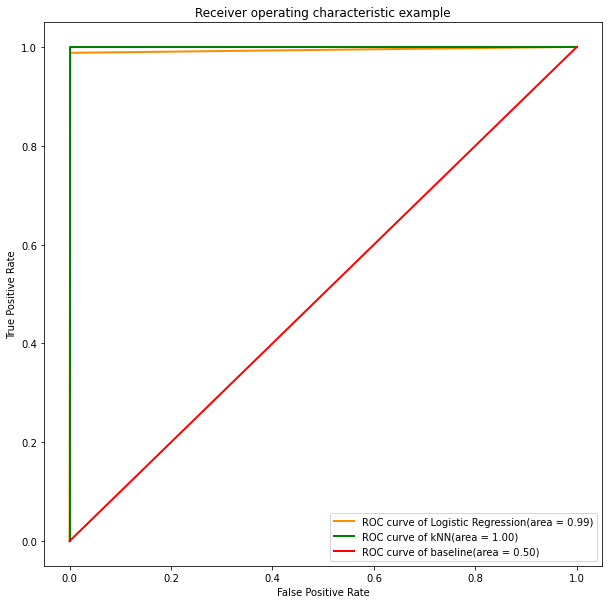

In [127]:
from sklearn.metrics import roc_curve,auc

fpr_l,tpr_l,_ = roc_curve(y, predictions_l)
roc_auc_l = auc(fpr_l,tpr_l)


fpr_k,tpr_k,_ = roc_curve(y, predictions_k)
roc_auc_k = auc(fpr_k,tpr_k)


fpr_b,tpr_b,_ = roc_curve(y, predictions_b)
roc_auc_b = auc(fpr_b,tpr_b)

lw = 2 # 线的宽度

fig = plt.figure(figsize=(10,10))
plt.plot(fpr_l,tpr_l, color='darkorange',lw=lw, label='ROC curve of Logistic Regression(area = %0.2f)' % roc_auc_l)
plt.plot(fpr_k,tpr_k, color='green',lw=lw, label='ROC curve of kNN(area = %0.2f)' % roc_auc_k)
plt.plot(fpr_b,tpr_b, color='red',lw=lw, label='ROC curve of baseline(area = %0.2f)' % roc_auc_b)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### (e)

Logistic Regression and kNN are better than the baseline classifier.The auc of random classifier is 0.5.I recommend using kNN because it has the biggest auc.

## (ii)

In [200]:
# id:15--30--15-0 
import pandas as pd
# 导入数据
df = pd.read_csv("week4_2.csv")
# 打印
print(df)

        X1    X2  Y
0    -0.02  0.49  1
1     0.61 -0.44  1
2     0.15  0.86  1
3     0.98 -0.53  1
4     0.15 -0.42  1
...    ...   ... ..
1709 -0.20 -0.80  1
1710  0.37 -0.22  1
1711  0.10  0.86 -1
1712  0.68 -0.52  1
1713  0.74  0.76 -1

[1714 rows x 3 columns]


In [201]:
import numpy as np
X_1 = df.iloc[:,0] # 第一列
X_2 = df.iloc[:,1] # 第二列
y = df.iloc[:,2] # 第三列

In [202]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1709    1
1710    1
1711   -1
1712    1
1713   -1
Name: Y, Length: 1714, dtype: int64

Text(0, 0.5, 'x_2')

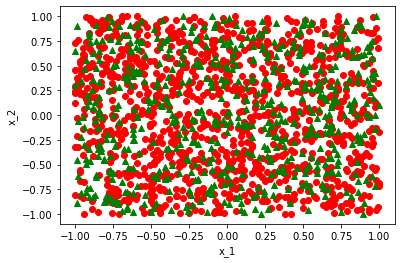

In [203]:
import matplotlib.pyplot as plt
df_p = df.loc[df['Y'] == 1]
df_n = df.loc[df['Y'] == -1]
X1_p = df_p.iloc[:,0]
X2_p = df_p.iloc[:,1]
X1_n = df_n.iloc[:,0]
X2_n = df_n.iloc[:,1]
plt.scatter(X1_p,X2_p,c='r',marker='o') # 红色点的y值为1
plt.scatter(X1_n,X2_n,c='g',marker='^') # 绿色点的y值为-1
plt.xlabel('x_1')
plt.ylabel('x_2')

### (a)

In [204]:
from sklearn.preprocessing import PolynomialFeatures
X1_train = X_1
X2_train = X_2
y_train = y

X_train = np.column_stack((X1_train,X2_train))
# list of maximum polynomial orders
degree = [1,2,3,4,5]
# augment

# degree = 1
poly_1 = PolynomialFeatures(degree[0])
X_poly_train_1 = (poly_1.fit_transform(X_train))
X_poly_test_1 = X_poly_train_1
# degree = 2
poly_2 = PolynomialFeatures(degree[1])
X_poly_train_2 = (poly_2.fit_transform(X_train))
X_poly_test_2 = X_poly_train_2
# degree = 3
poly_3 = PolynomialFeatures(degree[2])
X_poly_train_3 = (poly_3.fit_transform(X_train))
X_poly_test_3 = X_poly_train_3
# degree = 4
poly_4 = PolynomialFeatures(degree[3])
X_poly_train_4 = (poly_4.fit_transform(X_train))
X_poly_test_4 = X_poly_train_4
# degree = 5
poly_5 = PolynomialFeatures(degree[4])
X_poly_train_5 = (poly_5.fit_transform(X_train))
X_poly_test_5 = X_poly_train_5

In [205]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
1709    1
1710    1
1711   -1
1712    1
1713   -1
Name: Y, Length: 1714, dtype: int64

In [206]:
from sklearn.linear_model import LogisticRegressionCV 
folds = [2,5,10,25,50,100] # cross-validation值列表
C = [1,10,100,1000] # C值列表

### 控制变量法：先固定folds数(LogisticRegressionCV)为5（default value)，选出maximum polynomial order

In [207]:
# degree = 1
reg_1 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_1,y_train) # 5 folds
reg_1.score(X_poly_test_1,y)

0.6674445740956826

In [208]:
# degree = 2
reg_2 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_2,y_train) # 5 folds
reg_2.score(X_poly_test_2,y)

0.6674445740956826

In [209]:
# degree = 3
reg_3 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_3,y_train) # 5 folds
reg_3.score(X_poly_test_3,y) 

0.6680280046674446

In [210]:
# degree = 4
reg_4 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_4,y_train) # 5 folds
reg_4.score(X_poly_test_4,y)

0.6662777129521587

In [211]:
# degree = 5
reg_5 = LogisticRegressionCV(cv=folds[1],Cs=C).fit(X_poly_train_5,y_train) # 5 folds
reg_5.score(X_poly_test_5,y) 

0.6656942823803967

In [212]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1709    1
1710    1
1711   -1
1712    1
1713   -1
Name: Y, Length: 1714, dtype: int64

### 以上结果显示：maximum polynomial order=3

### 接下来，固定maximum polynomial order=3，找到不同folds对应的表现

In [213]:
score = []
for i in range(len(folds)):
    reg = LogisticRegressionCV(cv=folds[i],Cs=C).fit(X_poly_train_3,y_train) 
    score.append(reg.score(X_poly_test_3,y))
score = np.array(score)

### 接下来，画cross-validation plots：score vs folds number(error bars)

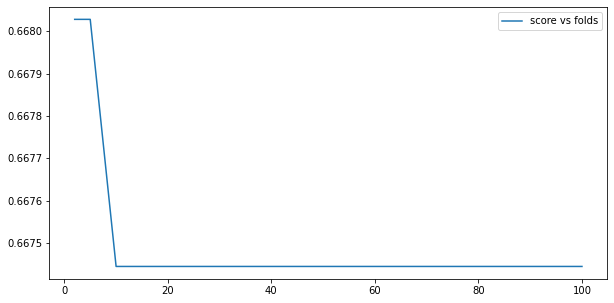

In [214]:
plt.figure(figsize=(10,5))
plt.errorbar(folds,score,label='score vs folds')
plt.legend()

### 由图可知，2folds或者5folds使score最大

### 接下来画plots of model predictions and the training data.

In [215]:
predictions_l=reg_3.predict(X_poly_test_3) # folds = 5
predictions_l

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [216]:
df_t = df
# predicted target values
df_t['Y'] = predictions_l
df_t

,X1,X2,Y
0,-0.02,0.49,1
1,0.61,-0.44,1
2,0.15,0.86,1
3,0.98,-0.53,1
4,0.15,-0.42,1
...,...,...,...
1709,-0.20,-0.80,1
1710,0.37,-0.22,1
1711,0.10,0.86,1
1712,0.68,-0.52,1


In [217]:
# preprocessing of predictions
df_t_p = df_t.loc[df['Y'] == 1]
df_t_n = df_t.loc[df['Y'] == -1]
X1_t_p = df_t_p.iloc[:,0]
X2_t_p = df_t_p.iloc[:,1]
X1_t_n = df_t_n.iloc[:,0]
X2_t_n = df_t_n.iloc[:,1]

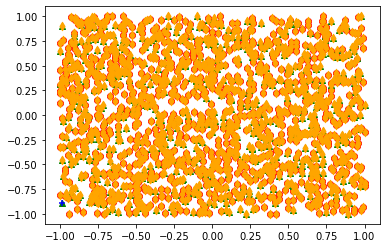

In [218]:
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_t_p,X2_t_p,c='orange',marker='d')
plt.scatter(X1_t_n,X2_t_n,c='blue',marker='+')

### 很显然，模型预测得很不好（基本都预测为正例了）

### (b)

### 首先不进行augmenting the features with polynomial features

D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\AI\Software\ANACO

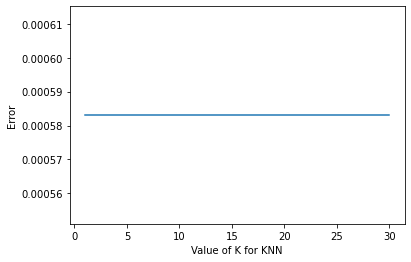

In [219]:
from sklearn.model_selection  import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 31)
k_error = []
# 循环，取k=1到k=31，查看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cv参数决定数据集划分比例，这里是按照4:1划分训练集和测试集--之所以选择5folds，是因为上一问5folds效果不错
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_error.append(1 - scores.mean())

# 画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

### 由图可知，k的值不影响模型表现

### 考察是否需要进行augmenting the features with polynomial features，使用上一问得到的maximum polynomial order=3

In [220]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_poly_train_3,y_train)
predictions_k = knn.predict(X_poly_test_3)
predictions_k

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [221]:
df_k_t = df
# predicted target values
df_k_t['Y'] = predictions_k
df_k_t

,X1,X2,Y
0,-0.02,0.49,1
1,0.61,-0.44,1
2,0.15,0.86,1
3,0.98,-0.53,1
4,0.15,-0.42,1
...,...,...,...
1709,-0.20,-0.80,1
1710,0.37,-0.22,1
1711,0.10,0.86,1
1712,0.68,-0.52,1


In [222]:
# preprocessing of predictions
df_k_t_p = df_k_t.loc[df['Y'] == 1]
df_k_t_n = df_k_t.loc[df['Y'] == -1]
X1_k_t_p = df_k_t_p.iloc[:,0]
X2_k_t_p = df_k_t_p.iloc[:,1]
X1_k_t_n = df_k_t_n.iloc[:,0]
X2_k_t_n = df_k_t_n.iloc[:,1]

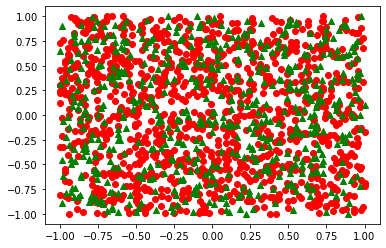

In [223]:
# training data单独画图作为对照
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')

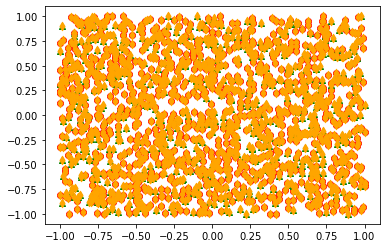

In [224]:
# training data和predictions画在一起
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_k_t_p,X2_k_t_p,c='orange',marker='d')
plt.scatter(X1_k_t_n,X2_k_t_n,c='blue',marker='+')

### 上图显示，augmenting the features with polynomial features对模型表现毫无作用

### (c)

### confusion matrix for my Logistic Regression

In [225]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,predictions_l)

array([[   0,    0],
       [   1, 1713]], dtype=int64)

### confusion matrix for my kNN

In [226]:
confusion_matrix(y,predictions_k)

array([[1714]], dtype=int64)

### the most frequent class in the training data:negative

In [227]:
predictions_b = [1]*1714
predictions_b

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [228]:
confusion_matrix(y,predictions_b)

array([[1714]], dtype=int64)

### (d)

D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\metrics\_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\metrics\_ranking.py:89: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


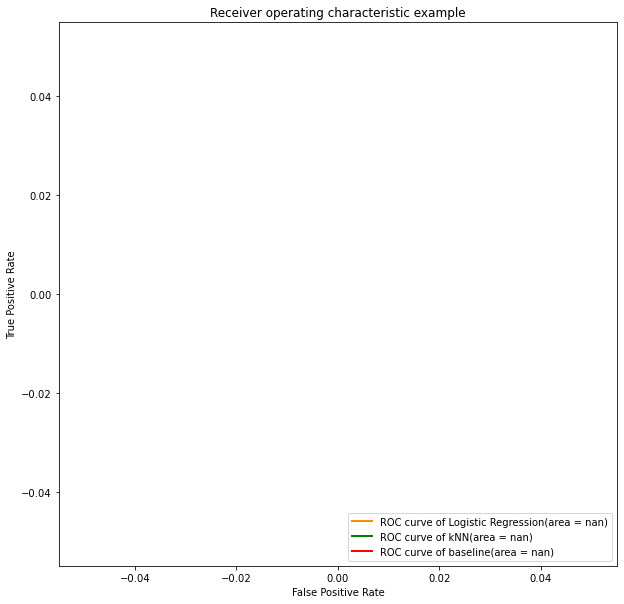

In [229]:
from sklearn.metrics import roc_curve,auc

fpr_l,tpr_l,_ = roc_curve(y, predictions_l)
roc_auc_l = auc(fpr_l,tpr_l)


fpr_k,tpr_k,_ = roc_curve(y, predictions_k)
roc_auc_k = auc(fpr_k,tpr_k)


fpr_b,tpr_b,_ = roc_curve(y, predictions_b)
roc_auc_b = auc(fpr_b,tpr_b)

lw = 2 # 线的宽度

fig = plt.figure(figsize=(10,10))
plt.plot(fpr_l,tpr_l, color='darkorange',lw=lw, label='ROC curve of Logistic Regression(area = %0.2f)' % roc_auc_l)
plt.plot(fpr_k,tpr_k, color='green',lw=lw, label='ROC curve of kNN(area = %0.2f)' % roc_auc_k)
plt.plot(fpr_b,tpr_b, color='red',lw=lw, label='ROC curve of baseline(area = %0.2f)' % roc_auc_b)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### (e)

任何模型都不能将此数据集分类得很好